Import libraries for building learning models and analytical graphs

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Build dataframes for train set and test set from csv files

In [2]:
train = pd.read_csv('cell2celltrain.csv')
test = pd.read_csv('cell2cellholdout.csv')

In [3]:
train.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30.0,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30.0,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,NaN,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10.0,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10.0,No,1-Highest,Other,Professional,Yes


In [4]:
test.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,0,5,No,1,150.0,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,0,6,No,2,80.0,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,0,4,No,3,10.0,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,0,4,No,1,200.0,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,0,3,No,0,10.0,No,1-Highest,Suburban,Other,No


## Data Analysis and Preprocessing

Since 'CustomerID' and 'ServiceArea' don't really affect the churn result, we can remove these columns from the dataset.

In [5]:
train.drop(['CustomerID', 'ServiceArea'], axis=1, inplace=True)
test.drop(['CustomerID', 'ServiceArea'], axis=1, inplace=True)

### Churn - NonChurn analysis

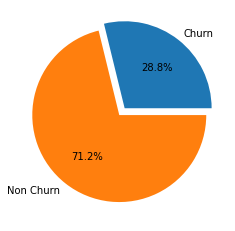

In [6]:
churnIndex = train[train['Churn']=='Yes'].shape[0]
nonChurnIndex = train[train['Churn']=='No'].shape[0]

plt.pie([churnIndex, nonChurnIndex], explode = [0.1, 0], labels = ['Churn','Non Churn'], autopct='%1.1f%%', startangle=0)  
plt.show()

### Categories of dataset

In [7]:
print("Categorical Var. : {}".format(train.select_dtypes(exclude=['int', 'float']).columns))

print("Numeric Var. : {}".format(train.select_dtypes(include=['int', 'float']).columns))

Categorical Var. : Index(['Churn', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable',
       'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder',
       'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer',
       'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser',
       'OwnsMotorcycle', 'MadeCallToRetentionTeam', 'CreditRating',
       'PrizmCode', 'Occupation', 'MaritalStatus'],
      dtype='object')
Numeric Var. : Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetMode

### Missing values

Detect columns with missing values

In [8]:
train.columns[train.isna().any()].tolist()

['MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2',
 'Homeownership',
 'HandsetPrice',
 'MaritalStatus']

In [9]:
test.columns[test.isna().any()].tolist()

['Churn',
 'MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'AgeHH1',
 'AgeHH2',
 'Homeownership',
 'HandsetPrice',
 'MaritalStatus']

In [10]:
train_missings = train.filter(['MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2',
 'Homeownership',
 'HandsetPrice',
 'MaritalStatus'], axis=1)
test_missings = test.filter(['Churn',
 'MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'AgeHH1',
 'AgeHH2',
 'Homeownership',
 'HandsetPrice',
 'MaritalStatus'], axis=1)

Illustrates the missing-value rates to eliminate columns with high missing-value rate: 

In [11]:
print("Missing-value rate of train data:")
mis_val_train = train_missings.isnull().sum() / len(train_missings) * 100
print(mis_val_train)
print()
print("Missing-value rate of test data:")
mis_val_test = test_missings.isnull().sum() / len(test_missings) * 100
print(mis_val_test)

Missing-value rate of train data:
MonthlyRevenue            0.305601
MonthlyMinutes            0.305601
TotalRecurringCharge      0.305601
DirectorAssistedCalls     0.305601
OverageMinutes            0.305601
RoamingCalls              0.305601
PercChangeMinutes         0.718945
PercChangeRevenues        0.718945
Handsets                  0.001959
HandsetModels             0.001959
CurrentEquipmentDays      0.001959
AgeHH1                    1.780712
AgeHH2                    1.780712
Homeownership            33.420181
HandsetPrice             56.775129
MaritalStatus            38.591886
dtype: float64

Missing-value rate of test data:
Churn                    100.000
MonthlyRevenue             0.300
MonthlyMinutes             0.300
TotalRecurringCharge       0.300
DirectorAssistedCalls      0.300
OverageMinutes             0.300
RoamingCalls               0.300
PercChangeMinutes          0.675
PercChangeRevenues         0.675
AgeHH1                     1.675
AgeHH2                     

'Homeownership', 'HandsetPrice', 'MaritalStatus' have high rate of missing values. Therefore, we should drop these columns from the datasets.

In [12]:
train.drop(['Homeownership', 'HandsetPrice', 'MaritalStatus'], axis=1, inplace=True)
test.drop(['Homeownership', 'HandsetPrice', 'MaritalStatus'], axis=1, inplace=True)

### Outliers detection

In [13]:
print ("There are " + str(train.shape[1]) + " columns and  " + str(train.shape[0]) + " rows in the train data.\n")
print("There are " + str(test.shape[1]) + " columns and " + str(test.shape[0]) + " rows in the test data.\n")

There are 53 columns and  51047 rows in the train data.

There are 53 columns and 20000 rows in the test data.



In [14]:
from scipy.stats import zscore

train_outliers=train.select_dtypes(include=['int', 'float'])
train_outliers.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,2.0,2.0,361.0,62.0,0.0,1,0,0,4,0
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,...,2.0,1.0,1504.0,40.0,42.0,0,0,0,5,0
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,...,1.0,1.0,1812.0,26.0,26.0,0,0,0,6,0
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,...,9.0,4.0,458.0,30.0,0.0,0,0,0,6,0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,...,4.0,3.0,852.0,46.0,54.0,0,0,0,9,1


Check number of outliers using "zscore":

In [15]:
outliers1={}
for col in train_outliers:
    z_score = zscore(train_outliers[col])
    upper_replace_value = train_outliers[z_score<=3][col].max()
    lower_replace_value = train_outliers[z_score>=-3][col].min()
    outliers1[col] = len(train_outliers[col][(train_outliers[col] > upper_replace_value)| (train_outliers[col] < lower_replace_value)])
outliers_zscore = pd.DataFrame(outliers1.items(),columns=['Feature','Outliers'])
print(outliers_zscore)

                      Feature  Outliers
0              MonthlyRevenue         0
1              MonthlyMinutes         0
2        TotalRecurringCharge         0
3       DirectorAssistedCalls         0
4              OverageMinutes         0
5                RoamingCalls         0
6           PercChangeMinutes         0
7          PercChangeRevenues         0
8                DroppedCalls       987
9                BlockedCalls       819
10            UnansweredCalls       975
11          CustomerCareCalls       853
12              ThreewayCalls       567
13              ReceivedCalls      1067
14              OutboundCalls       966
15               InboundCalls       976
16             PeakCallsInOut       939
17          OffPeakCallsInOut      1034
18        DroppedBlockedCalls       883
19        CallForwardingCalls        49
20           CallWaitingCalls       765
21            MonthsInService       583
22                 UniqueSubs       234
23                 ActiveSubs       611


Replace outliers with upper/lower replace value:

In [16]:
'''train_new = train_outliers.copy()
outliers2={}
for col in train_outliers:
    z_score = zscore(train_outliers[col])
    upper_replace_value = train_outliers[z_score<=3][col].max()
    lower_replace_value = train_outliers[z_score>=-3][col].min()
    train_new.loc[train_outliers[col] > upper_replace_value, col] = upper_replace_value
    train_new.loc[train_outliers[col] < lower_replace_value, col] = lower_replace_value
    outliers2[col] = len(train_new[col][(train_new[col] > upper_replace_value)| (train_new[col] < lower_replace_value)])
outliers_zscore = pd.DataFrame(outliers2.items(),columns=['Feature','Outliers'])
print(outliers_zscore)'''

outliers2={}
for col in train_outliers:
    z_score = zscore(train_outliers[col])
    upper_replace_value = train_outliers[z_score<=3][col].max()
    lower_replace_value = train_outliers[z_score>=-3][col].min()
    train.loc[train_outliers[col] > upper_replace_value, col] = upper_replace_value
    train.loc[train_outliers[col] < lower_replace_value, col] = lower_replace_value
    outliers2[col] = len(train[col][(train[col] > upper_replace_value)| (train[col] < lower_replace_value)])
outliers_zscore = pd.DataFrame(outliers2.items(),columns=['Feature','Outliers'])
print(outliers_zscore)

                      Feature  Outliers
0              MonthlyRevenue         0
1              MonthlyMinutes         0
2        TotalRecurringCharge         0
3       DirectorAssistedCalls         0
4              OverageMinutes         0
5                RoamingCalls         0
6           PercChangeMinutes         0
7          PercChangeRevenues         0
8                DroppedCalls         0
9                BlockedCalls         0
10            UnansweredCalls         0
11          CustomerCareCalls         0
12              ThreewayCalls         0
13              ReceivedCalls         0
14              OutboundCalls         0
15               InboundCalls         0
16             PeakCallsInOut         0
17          OffPeakCallsInOut         0
18        DroppedBlockedCalls         0
19        CallForwardingCalls         0
20           CallWaitingCalls         0
21            MonthsInService         0
22                 UniqueSubs         0
23                 ActiveSubs         0


### Label encoding

Label encode categorical data

In [17]:
from sklearn.preprocessing import LabelEncoder

train_df=train.copy()

enc = LabelEncoder()

for col in train_df.columns:
    if train_df.dtypes[col] == object:
        enc.fit(train_df[col].astype(str))
        train_df[col] = enc.transform(train_df[col].astype(str))
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      51047 non-null  int32  
 1   MonthlyRevenue             50891 non-null  float64
 2   MonthlyMinutes             50891 non-null  float64
 3   TotalRecurringCharge       50891 non-null  float64
 4   DirectorAssistedCalls      50891 non-null  float64
 5   OverageMinutes             50891 non-null  float64
 6   RoamingCalls               50891 non-null  float64
 7   PercChangeMinutes          50680 non-null  float64
 8   PercChangeRevenues         50680 non-null  float64
 9   DroppedCalls               51047 non-null  float64
 10  BlockedCalls               51047 non-null  float64
 11  UnansweredCalls            51047 non-null  float64
 12  CustomerCareCalls          51047 non-null  float64
 13  ThreewayCalls              51047 non-null  flo

In [18]:
test_df=test.copy()

for col in test_df.columns:
    if test_df.dtypes[col] == object:
        enc.fit(test_df[col].astype(str))
        test_df[col] = enc.transform(test_df[col].astype(str))
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      0 non-null      float64
 1   MonthlyRevenue             19940 non-null  float64
 2   MonthlyMinutes             19940 non-null  float64
 3   TotalRecurringCharge       19940 non-null  float64
 4   DirectorAssistedCalls      19940 non-null  float64
 5   OverageMinutes             19940 non-null  float64
 6   RoamingCalls               19940 non-null  float64
 7   PercChangeMinutes          19865 non-null  float64
 8   PercChangeRevenues         19865 non-null  float64
 9   DroppedCalls               20000 non-null  float64
 10  BlockedCalls               20000 non-null  float64
 11  UnansweredCalls            20000 non-null  float64
 12  CustomerCareCalls          20000 non-null  float64
 13  ThreewayCalls              20000 non-null  flo

### Feature scaling & Train-Test split

Divide train set to feature matrix X and target vector y

In [19]:
y = train_df['Churn']
X= train_df.drop(columns=['Churn'],axis=1)

X.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,0,0,0,4,0,0,1,0,2,4
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,...,1,0,0,5,0,0,0,3,2,4
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,...,1,0,0,6,0,0,0,2,3,1
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,33.0,7.7,...,1,0,0,6,0,0,0,3,0,3
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,...,0,1,0,9,0,1,0,0,0,4


In [20]:
y.head()

0    1
1    1
2    0
3    0
4    1
Name: Churn, dtype: int32

Inside the train set, give 80% of the data to be used for learning and 20% for testing learning models

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999,stratify=y)

Perform standardization on feature matrix X

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

## Training model with different algorithms

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

logReg_X_train = X_train.copy()

logReg_X_train[logReg_X_train.columns] = imputer.fit_transform(logReg_X_train[logReg_X_train.columns])

# Create and fit the logistic regression model
logReg = LogisticRegression()
logReg.fit(logReg_X_train, y_train)

y_pred = logReg.predict(logReg_X_train)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7107280162597645


### Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Create a mean imputer
imputer = SimpleImputer(strategy='mean')

# Impute missing values in X_train
X_train_imputed = imputer.fit_transform(X_train)

# Create and fit the Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train_imputed, y_train)

X_test_imputed = imputer.fit_transform(X_test)

# Make predictions on the training set
y_pred = rf.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.7168462291870715
